In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [2]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
#    print('List of arrays in this file: \n', hf.keys())
    feature_cor = np.array(hf.get('WT_cor_onset_3s')).transpose()
    print('Shape of the array feature_cor = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('WT_incor_onset_3s')).transpose()
    print('Shape of the array feature_incor = \n', feature_incor.shape)

    
#    data = hf.get('dataset_1')
#    np_data = np.array(data)
    

Shape of the array feature_cor = 
 (1596, 36)
Shape of the array feature_incor = 
 (1596, 8)


([array([ 12.,  96., 235., 449., 417., 236.,  95.,  39.,  13.,   4.]),
  array([ 11., 100., 242., 461., 427., 227.,  92.,  25.,  10.,   1.]),
  array([  8.,  71., 196., 414., 469., 299.,  76.,  51.,  10.,   2.]),
  array([ 18.,  97., 236., 405., 361., 253., 113.,  92.,  18.,   3.]),
  array([ 29., 109., 216., 475., 389., 215., 113.,  35.,   9.,   6.]),
  array([ 20.,  94., 261., 468., 438., 199.,  75.,  25.,  11.,   5.]),
  array([ 33., 113., 248., 428., 361., 222., 116.,  57.,  17.,   1.]),
  array([ 27., 106., 277., 429., 440., 220.,  63.,  24.,   9.,   1.])],
 array([ 9.86031879, 14.6409511 , 19.42158341, 24.20221571, 28.98284802,
        33.76348033, 38.54411264, 43.32474494, 48.10537725, 52.88600956,
        57.66664186]),
 <a list of 8 Lists of Patches objects>)

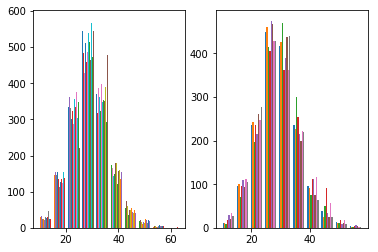

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
plt.hist(feature_cor)
plt.subplot(122)
plt.hist(feature_incor)

(array([119., 150., 183., 146., 151., 155., 179., 158., 153., 202.]),
 array([0.00423202, 0.10380882, 0.20338561, 0.30296241, 0.40253921,
        0.50211601, 0.60169281, 0.70126961, 0.8008464 , 0.9004232 ,
        1.        ]),
 <a list of 10 Patch objects>)

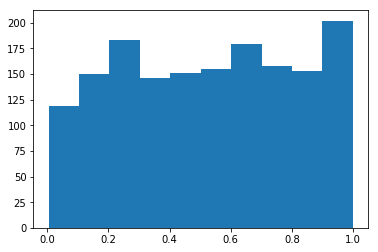

In [4]:
# Calculate the Wilcoxon signed-rank test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

dimFeature, numTrialCor = feature_cor.shape
dimFeature, numTrialIncor = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[i,:], feature_incor[i,:])
    pVal.append(p)
plt.hist(pVal)

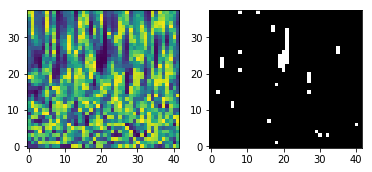

In [5]:
pVal2D = np.reshape(pVal, (38, 42))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()

In [6]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]
#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(42):
    for i in range(38):
        if pVal2D[i][ch] < 0.05: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch,i))
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=3, freq=19
ch=4, freq=36
ch=4, freq=40
ch=4, freq=44
ch=7, freq=12
ch=7, freq=13
ch=9, freq=32
ch=9, freq=52
ch=9, freq=100
ch=14, freq=100
ch=17, freq=8
ch=18, freq=80
ch=18, freq=84
ch=19, freq=2
ch=19, freq=23
ch=20, freq=36
ch=20, freq=40
ch=20, freq=44
ch=20, freq=48
ch=21, freq=32
ch=21, freq=36
ch=21, freq=40
ch=21, freq=44
ch=21, freq=48
ch=21, freq=52
ch=22, freq=40
ch=22, freq=44
ch=22, freq=48
ch=22, freq=52
ch=22, freq=56
ch=22, freq=64
ch=22, freq=68
ch=22, freq=72
ch=22, freq=76
ch=22, freq=80
ch=28, freq=19
ch=28, freq=25
ch=28, freq=27
ch=28, freq=29
ch=30, freq=5
ch=31, freq=4
ch=33, freq=4
ch=36, freq=52
ch=36, freq=56
ch=41, freq=7
[(2, 15), (3, 22), (3, 23), (3, 24), (6, 11), (6, 12), (8, 21), (8, 26), (8, 37), (13, 37), (16, 7), (17, 32), (17, 33), (18, 1), (18, 17), (19, 22), (19, 23), (19, 24), (19, 25), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (20, 26), (21, 23), (21, 24), (21, 25), (21, 26), (21, 27), (21, 28), (21, 29), (21, 30), (21, 31), (21, 32)

In [7]:
# Now, select features 

idx=np.array(pVal)<0.05
selected_feature_cor = feature_cor[idx,:]
selected_feature_incor = feature_incor[idx,:]

In [8]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(45, 36)
(45, 8)


In [9]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=1)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 1.08061708e-15 -6.31593543e-16  1.40134817e-15  3.35534070e-16
 -1.48029737e-17  4.83563806e-16  7.59885981e-16 -9.86864911e-17
  1.00166788e-15  8.38835174e-16 -1.82570008e-16  2.17110280e-16
 -1.12502600e-15  7.45083008e-16 -2.26978929e-16 -7.99360578e-16
  5.82250297e-16  5.08235429e-16 -5.52644350e-16 -2.22044605e-16
 -2.29939524e-15  1.23358114e-16 -1.12502600e-15  1.08555140e-16
 -1.32239898e-15  1.77635684e-16  1.67767035e-16 -8.88178420e-17
 -9.86864911e-16 -7.79623280e-16 -9.17784367e-16 -6.95739762e-16
  4.14483263e-16 -9.42455990e-16 -1.33226763e-16 -1.08555140e-15
  7.00674087e-16 -1.63819575e-15  1.55924656e-15  3.30599745e-16
 -1.27799006e-15  5.32907052e-16 -2.96059473e-16  3.25665421e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


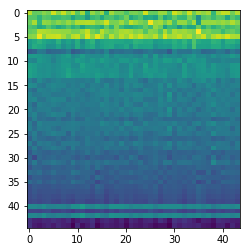

In [10]:
plt.imshow(X_scaled)

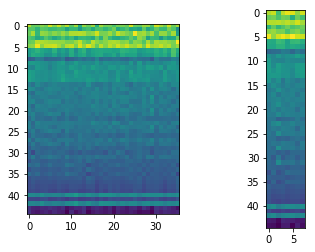

In [11]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[:,Y>0])
plt.subplot(122)
plt.imshow(X_scaled[:,Y<0])

In [12]:
# save to a file
np.savetxt("X.txt",X_scaled)   # 45x44
np.savetxt("Y.txt", Y)         # 44x1